In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [384]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [385]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [386]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [387]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [388]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [389]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [390]:
filter2 = df_temp['최저기온(℃)'].isna() == True
df_temp['최저기온(℃)'][filter2] = 7.15625

In [391]:
df_korea = df_korea.reset_index()

In [392]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

In [393]:
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 3)

In [394]:
train_size = int(len(data)*0.9)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 17626 Test Size :  1959


In [395]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

In [396]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(17626, 3)

In [397]:
x_train = []
y_train = []
time_step = 60
n_col = 3

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       [0.10027223, 0.10108409, 0.08580366],
       [0.02510587, 0.04731907, 0.        ],
       [0.24319419, 0.25754468, 0.20527335],
       [0.22837266, 0.23513038, 0.23596008],
       [0.23835451, 0.25388222, 0.23447043],
       [0.17211131, 0.16319953, 0.18948309],
       [0.20220811, 0.21432757, 0.19603754],
       [0.23275862, 0.25212423, 0.2215105 ],
       [0.33318209, 0.35159684, 0.2919708 ],
       [0.15366001, 0.17096396, 0.17488455],
       [0.09195402, 0.10225608, 0.10859526],
       [0.06488203, 0.05288602, 0.09742291],
       [0.05792498, 0.08980369, 0.04856249],
       [0.0738052 , 0.09449165, 0.07239684],
       [0.12885662, 0.18678582, 0.1084463 ],
       [0.17029643, 0.20773513, 0.16803218],
       [0.1822444 , 0.22121301, 0.17116043],
       [0.22081065, 0.27175505, 0.194101  ],
       [0.28055051, 0.32390858, 0.248

60 3620
60 3621
60 3622
60 3623
60 3624
60 3625
60 3626
60 3627
60 3628
60 3629
60 3630
60 3631
60 3632
60 3633
60 3634
60 3635
60 3636
60 3637
60 3638
60 3639
60 3640
60 3641
60 3642
60 3643
60 3644
60 3645
60 3646
60 3647
60 3648
60 3649
60 3650
60 3651
60 3652
60 3653
60 3654
60 3655
60 3656
60 3657
60 3658
60 3659
60 3660
60 3661
60 3662
60 3663
60 3664
60 3665
60 3666
60 3667
60 3668
60 3669
60 3670
60 3671
60 3672
60 3673
60 3674
60 3675
60 3676
60 3677
60 3678
60 3679
60 3680
60 3681
60 3682
60 3683
60 3684
60 3685
60 3686
60 3687
60 3688
60 3689
60 3690
60 3691
60 3692
60 3693
60 3694
60 3695
60 3696
60 3697
60 3698
60 3699
60 3700
60 3701
60 3702
60 3703
60 3704
60 3705
60 3706
60 3707
60 3708
60 3709
60 3710
60 3711
60 3712
60 3713
60 3714
60 3715
60 3716
60 3717
60 3718
60 3719
60 3720
60 3721
60 3722
60 3723
60 3724
60 3725
60 3726
60 3727
60 3728
60 3729
60 3730
60 3731
60 3732
60 3733
60 3734
60 3735
60 3736
60 3737
60 3738
60 3739
60 3740
60 3741
60 3742
60 3743
60 3744


60 6819
60 6820
60 6821
60 6822
60 6823
60 6824
60 6825
60 6826
60 6827
60 6828
60 6829
60 6830
60 6831
60 6832
60 6833
60 6834
60 6835
60 6836
60 6837
60 6838
60 6839
60 6840
60 6841
60 6842
60 6843
60 6844
60 6845
60 6846
60 6847
60 6848
60 6849
60 6850
60 6851
60 6852
60 6853
60 6854
60 6855
60 6856
60 6857
60 6858
60 6859
60 6860
60 6861
60 6862
60 6863
60 6864
60 6865
60 6866
60 6867
60 6868
60 6869
60 6870
60 6871
60 6872
60 6873
60 6874
60 6875
60 6876
60 6877
60 6878
60 6879
60 6880
60 6881
60 6882
60 6883
60 6884
60 6885
60 6886
60 6887
60 6888
60 6889
60 6890
60 6891
60 6892
60 6893
60 6894
60 6895
60 6896
60 6897
60 6898
60 6899
60 6900
60 6901
60 6902
60 6903
60 6904
60 6905
60 6906
60 6907
60 6908
60 6909
60 6910
60 6911
60 6912
60 6913
60 6914
60 6915
60 6916
60 6917
60 6918
60 6919
60 6920
60 6921
60 6922
60 6923
60 6924
60 6925
60 6926
60 6927
60 6928
60 6929
60 6930
60 6931
60 6932
60 6933
60 6934
60 6935
60 6936
60 6937
60 6938
60 6939
60 6940
60 6941
60 6942
60 6943


60 10260
60 10261
60 10262
60 10263
60 10264
60 10265
60 10266
60 10267
60 10268
60 10269
60 10270
60 10271
60 10272
60 10273
60 10274
60 10275
60 10276
60 10277
60 10278
60 10279
60 10280
60 10281
60 10282
60 10283
60 10284
60 10285
60 10286
60 10287
60 10288
60 10289
60 10290
60 10291
60 10292
60 10293
60 10294
60 10295
60 10296
60 10297
60 10298
60 10299
60 10300
60 10301
60 10302
60 10303
60 10304
60 10305
60 10306
60 10307
60 10308
60 10309
60 10310
60 10311
60 10312
60 10313
60 10314
60 10315
60 10316
60 10317
60 10318
60 10319
60 10320
60 10321
60 10322
60 10323
60 10324
60 10325
60 10326
60 10327
60 10328
60 10329
60 10330
60 10331
60 10332
60 10333
60 10334
60 10335
60 10336
60 10337
60 10338
60 10339
60 10340
60 10341
60 10342
60 10343
60 10344
60 10345
60 10346
60 10347
60 10348
60 10349
60 10350
60 10351
60 10352
60 10353
60 10354
60 10355
60 10356
60 10357
60 10358
60 10359
60 10360
60 10361
60 10362
60 10363
60 10364
60 10365
60 10366
60 10367
60 10368
60 10369
60 10370
6

60 13558
60 13559
60 13560
60 13561
60 13562
60 13563
60 13564
60 13565
60 13566
60 13567
60 13568
60 13569
60 13570
60 13571
60 13572
60 13573
60 13574
60 13575
60 13576
60 13577
60 13578
60 13579
60 13580
60 13581
60 13582
60 13583
60 13584
60 13585
60 13586
60 13587
60 13588
60 13589
60 13590
60 13591
60 13592
60 13593
60 13594
60 13595
60 13596
60 13597
60 13598
60 13599
60 13600
60 13601
60 13602
60 13603
60 13604
60 13605
60 13606
60 13607
60 13608
60 13609
60 13610
60 13611
60 13612
60 13613
60 13614
60 13615
60 13616
60 13617
60 13618
60 13619
60 13620
60 13621
60 13622
60 13623
60 13624
60 13625
60 13626
60 13627
60 13628
60 13629
60 13630
60 13631
60 13632
60 13633
60 13634
60 13635
60 13636
60 13637
60 13638
60 13639
60 13640
60 13641
60 13642
60 13643
60 13644
60 13645
60 13646
60 13647
60 13648
60 13649
60 13650
60 13651
60 13652
60 13653
60 13654
60 13655
60 13656
60 13657
60 13658
60 13659
60 13660
60 13661
60 13662
60 13663
60 13664
60 13665
60 13666
60 13667
60 13668
6

60 17054
60 17055
60 17056
60 17057
60 17058
60 17059
60 17060
60 17061
60 17062
60 17063
60 17064
60 17065
60 17066
60 17067
60 17068
60 17069
60 17070
60 17071
60 17072
60 17073
60 17074
60 17075
60 17076
60 17077
60 17078
60 17079
60 17080
60 17081
60 17082
60 17083
60 17084
60 17085
60 17086
60 17087
60 17088
60 17089
60 17090
60 17091
60 17092
60 17093
60 17094
60 17095
60 17096
60 17097
60 17098
60 17099
60 17100
60 17101
60 17102
60 17103
60 17104
60 17105
60 17106
60 17107
60 17108
60 17109
60 17110
60 17111
60 17112
60 17113
60 17114
60 17115
60 17116
60 17117
60 17118
60 17119
60 17120
60 17121
60 17122
60 17123
60 17124
60 17125
60 17126
60 17127
60 17128
60 17129
60 17130
60 17131
60 17132
60 17133
60 17134
60 17135
60 17136
60 17137
60 17138
60 17139
60 17140
60 17141
60 17142
60 17143
60 17144
60 17145
60 17146
60 17147
60 17148
60 17149
60 17150
60 17151
60 17152
60 17153
60 17154
60 17155
60 17156
60 17157
60 17158
60 17159
60 17160
60 17161
60 17162
60 17163
60 17164
6

In [398]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [399]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [400]:
x_train.shape, y_train.shape

((19525, 60, 3), (19525, 3))

In [409]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    #keras.layers.LSTM(50, return_sequences = True, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    #keras.layers.LSTM(64, return_sequences = False, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 60, 50)            10800     
                                                                 
 lstm_61 (LSTM)              (None, 64)                29440     
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 16)                528       
                                                                 
 dense_77 (Dense)            (None, 3)                 51        
                                                                 
Total params: 42,899
Trainable params: 42,899
Non-trainable params: 0
_________________________________________________________________


In [410]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [411]:
h = m_lstm.fit(x_train, y_train, epochs = 100, shuffle=False, batch_size = 32)

Epoch 1/100
611/611 [==============================] - 14s 22ms/step - loss: 0.0518 - mae: 0.0852
Epoch 2/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0127 - mae: 0.0647
Epoch 3/100
611/611 [==============================] - 13s 21ms/step - loss: 0.0107 - mae: 0.0639
Epoch 4/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0094 - mae: 0.0625
Epoch 5/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0088 - mae: 0.0619
Epoch 6/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0084 - mae: 0.0613
Epoch 7/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0079 - mae: 0.0605
Epoch 8/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0075 - mae: 0.0596
Epoch 9/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0078 - mae: 0.0592
Epoch 10/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0137 - mae: 0.0606
Epoch 11/100
611/61

611/611 [==============================] - 13s 22ms/step - loss: 0.0056 - mae: 0.0543
Epoch 84/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0056 - mae: 0.0542
Epoch 85/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0056 - mae: 0.0540
Epoch 86/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0056 - mae: 0.0541
Epoch 87/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0056 - mae: 0.0541
Epoch 88/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0055 - mae: 0.0540
Epoch 89/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0055 - mae: 0.0540
Epoch 90/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0055 - mae: 0.0538
Epoch 91/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0055 - mae: 0.0539
Epoch 92/100
611/611 [==============================] - 13s 22ms/step - loss: 0.0055 - mae: 0.0538
Epoch 93/100
611/611 [=

# 건들지 마시오

Text(0, 0.5, 'Losses')

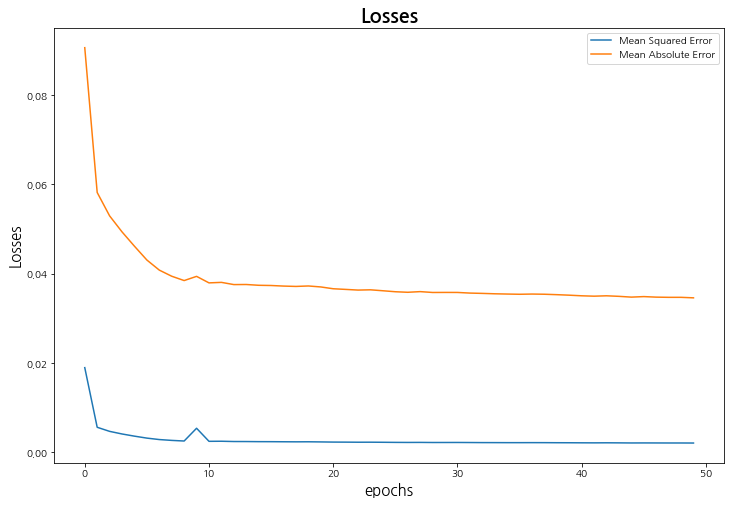

In [153]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [155]:
m_lstm_RMSprop = tf.keras.models.load_model('m4_lstm_RMSprop.h5')

In [154]:
# 8/25 loss율 엄청 좋음
m_lstm.save('m4_lstm_RMSprop.h5')

# 건들지 마시오

Text(0, 0.5, 'Losses')

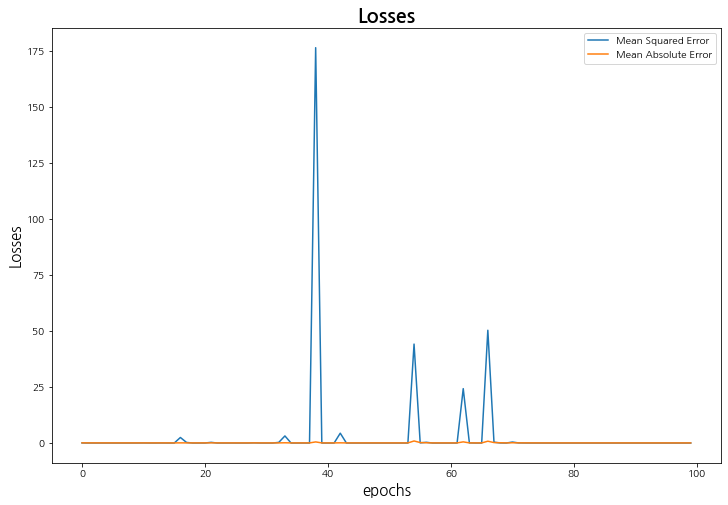

In [412]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [413]:
#8/30
m_lstm.save('m5_lstm_RMSprop.h5')

In [414]:
m_lstm_RMSprop = tf.keras.models.load_model('m5_lstm_RMSprop.h5')

In [415]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.10480944, 0.09888661, 0.1333234 ],
        [0.10496068, 0.11295048, 0.12393863],
        [0.08908046, 0.09185467, 0.10665872],
        ...,
        [0.69676346, 0.71989452, 0.66393565],
        [0.69888082, 0.71608556, 0.67227767],
        [0.5508167 , 0.54995605, 0.57351408]],

       [[0.10496068, 0.11295048, 0.12393863],
        [0.08908046, 0.09185467, 0.10665872],
        [0.1276467 , 0.17096396, 0.08580366],
        ...,
        [0.69888082, 0.71608556, 0.67227767],
        [0.5508167 , 0.54995605, 0.57351408],
        [0.48790079, 0.4225022 , 0.54774318]],

       [[0.08908046, 0.09185467, 0.10665872],
        [0.1276467 , 0.17096396, 0.08580366],
        [0.21355112, 0.27263405, 0.16803218],
        ...,
        [0.5508167 , 0.54995605, 0.57351408],
        [0.48790079, 0.4225022 , 0.54774318],
        [0.45946763, 0.46777029, 0.46223745]],

       ...,

       [[0.77208106, 0.77234105, 0.7729778 ],
        [0.77283727, 0.77658951, 0.75495308],
        [0.82320024, 0

In [416]:
m_lstm_RMSprop.evaluate(x_test, y_test)

62/62 [==============================] - 1s 7ms/step - loss: 0.0054 - mae: 0.0527


[0.005444961134344339, 0.052744749933481216]

In [417]:
pred = m_lstm_RMSprop.predict(x_test)
pred

62/62 [==============================] - 1s 7ms/step


array([[0.644776  , 0.64364445, 0.6382795 ],
       [0.6391171 , 0.63830286, 0.6325225 ],
       [0.6185486 , 0.6188874 , 0.6115972 ],
       ...,
       [0.88604   , 0.8713826 , 0.88372916],
       [0.8934002 , 0.8783302 , 0.891217  ],
       [0.8934852 , 0.87841034, 0.8913034 ]], dtype=float32)

In [418]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(1959, 3)


array([[16.139118, 20.709482, 12.217314],
       [15.905265, 20.481596, 11.975773],
       [15.055269, 19.653286, 11.097824],
       ...,
       [26.109352, 30.42536 , 22.515461],
       [26.413513, 30.721762, 22.829622],
       [26.417025, 30.725182, 22.833248]], dtype=float32)

In [419]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[ 9.65625, 11.275  ,  8.41875],
       [ 8.48125, 13.20625,  4.83125],
       [ 5.65625,  9.50625,  2.79375],
       ...,
       [26.8875 , 31.00625, 23.51875],
       [27.4    , 31.6625 , 24.34375],
       [27.2375 , 31.2125 , 24.2125 ]])

In [420]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [421]:
pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

#pred.columns = ['예측평균기온', '예측최고기온']
#y_test.columns = ['실제평균기온', '실제최고기온']

In [422]:
df_pred = pd.concat((pred, y_test), axis = 1)
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

,예측평균기온,실제평균기온,예측최고기온,실제최고기온,예측최저기온,실제최저기온
0,16.139118,9.65625,20.709482,11.27500,12.217314,8.41875
1,15.905265,8.48125,20.481596,13.20625,11.975773,4.83125
2,15.055269,5.65625,19.653286,9.50625,11.097824,2.79375
3,14.252079,7.96875,18.870590,12.62500,10.268218,1.92500
4,13.783403,11.54375,18.413872,17.25625,9.784128,6.28750
...,...,...,...,...,...,...
1954,27.268175,26.24375,31.554619,29.97500,23.712393,22.85625
1955,26.150103,25.86250,30.465071,29.23125,22.557550,23.14375
1956,26.109352,26.88750,30.425360,31.00625,22.515461,23.51875
1957,26.413513,27.40000,30.721762,31.66250,22.829622,24.34375


Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


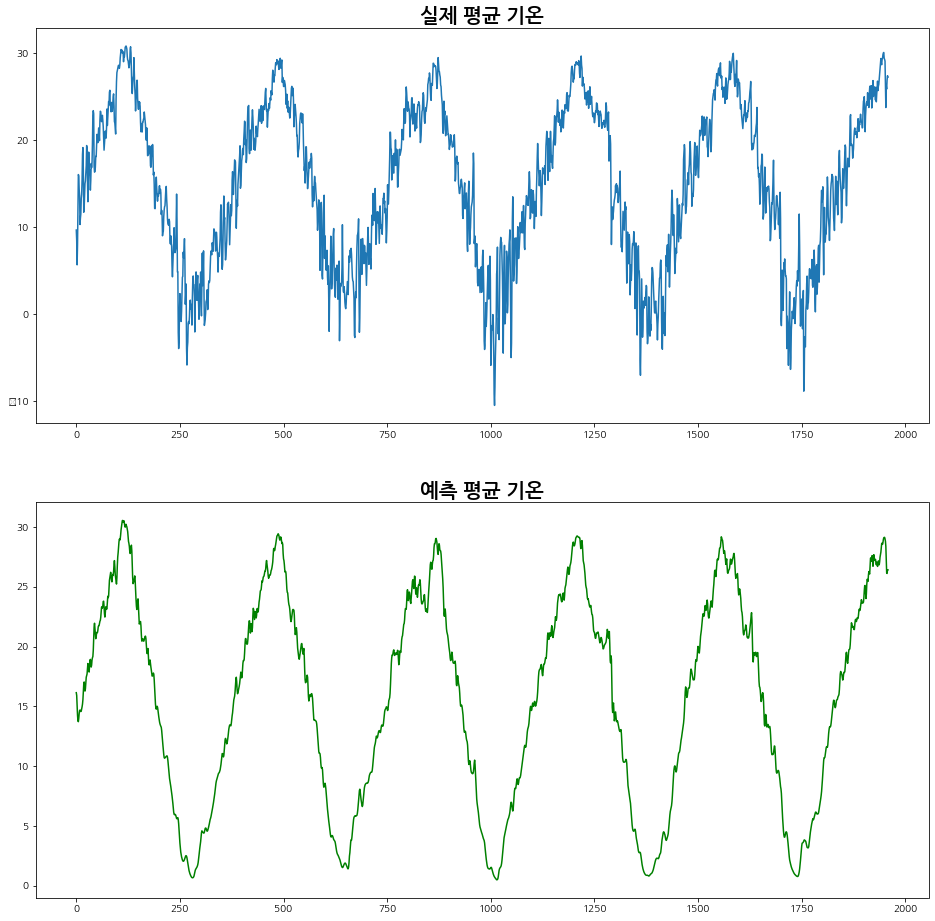

In [423]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

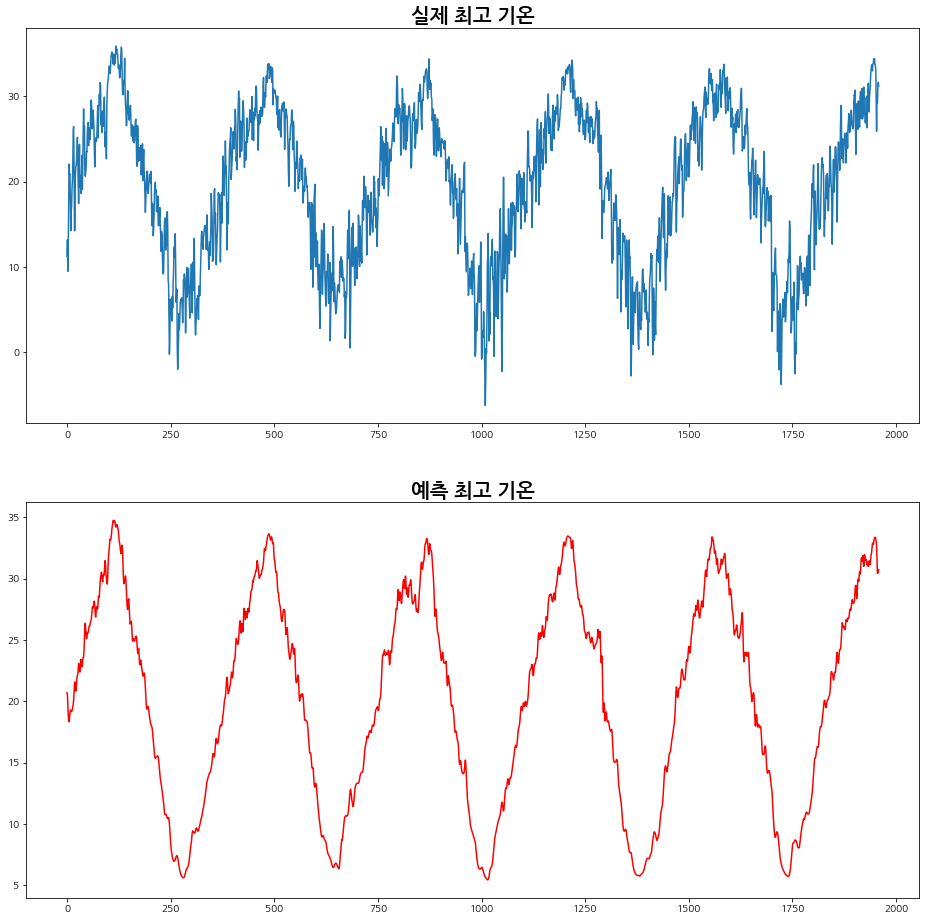

In [424]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최저 기온')

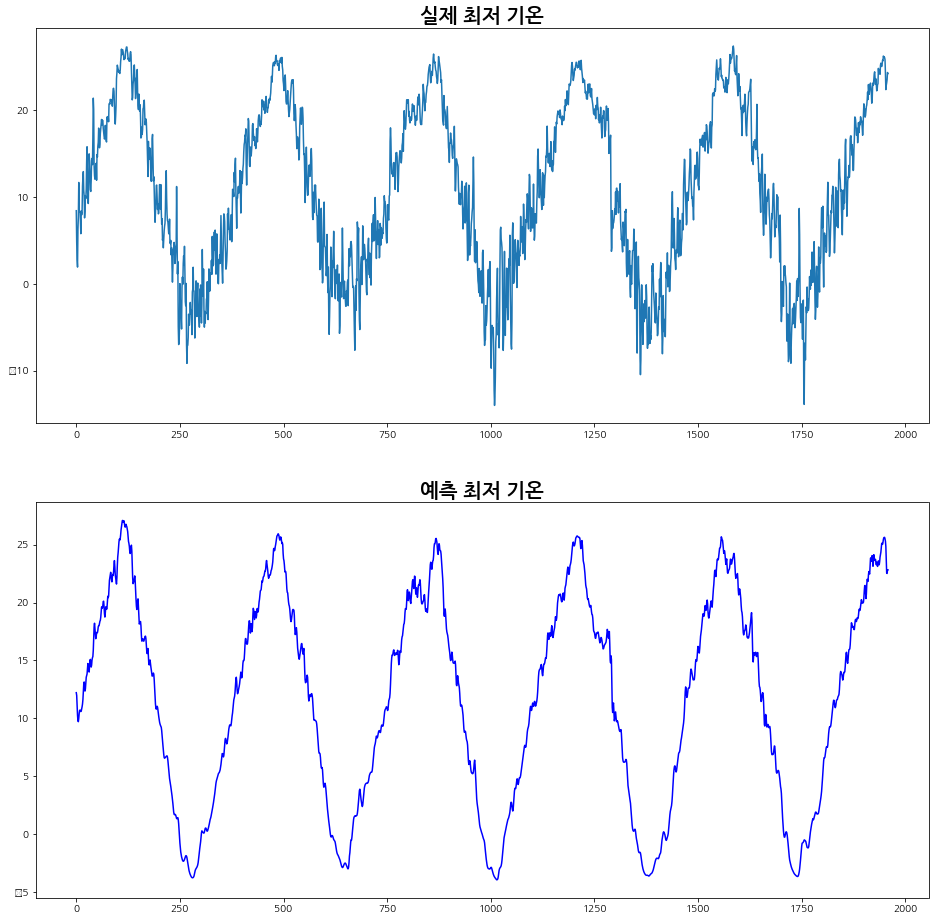

In [425]:

fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')


In [426]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2025-08-15
730


In [427]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335, 0.7738715924325935]

In [428]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.82320024, 0.8448579 , 0.77387159],
       [0.84664247, 0.86595371, 0.81438999],
       [0.85012099, 0.86346323, 0.84120363],
       [0.85904416, 0.87884559, 0.8286906 ],
       [0.81261343, 0.77981248, 0.82809474],
       [0.76149425, 0.70216818, 0.80470728],
       [0.80490018, 0.7890419 , 0.80902726],
       [0.82698125, 0.82127161, 0.82064651],
       [0.8399879 , 0.84207442, 0.83345747],
       [0.84497883, 0.83899795, 0.83837331],
       [0.83514822, 0.77131556, 0.85282288],
       [0.87008469, 0.84837386, 0.87308208],
       [0.84694495, 0.81380018, 0.85297185],
       [0.85344828, 0.78757691, 0.89423507],
       [0.82879613, 0.777322  , 0.87546551],
       [0.86358137, 0.85701729, 0.86757039],
       [0.88384755, 0.87503662, 0.88559511],
       [0.888536  , 0.87283914, 0.89393714],
       [0.85269208, 0.7998828 , 0.89810815],
       [0.87265578, 0.8444184 , 0.88559511],
       [0.88944344, 0.88397304, 0.87099657],
       [0.82758621, 0.7998828 , 0.84299121],
       [0.

In [429]:
for i in range(time_step, d_day + time_step):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_RMSprop.predict(array)[0]))
    print(len(last_array))

60 60
[[0.82320024 0.8448579  0.77387159]
 [0.84664247 0.86595371 0.81438999]
 [0.85012099 0.86346323 0.84120363]
 [0.85904416 0.87884559 0.8286906 ]
 [0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.7947553

1/1 [==============================] - 0s 15ms/step
64
60 64
[[0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0

1/1 [==============================] - 0s 15ms/step
68
60 68
[[0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0

1/1 [==============================] - 0s 16ms/step
72
60 72
[[0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0

1/1 [==============================] - 0s 16ms/step
76
60 76
[[0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0

1/1 [==============================] - 0s 16ms/step
80
60 80
[[0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0

1/1 [==============================] - 0s 16ms/step
84
60 84
[[0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0

1/1 [==============================] - 0s 15ms/step
88
60 88
[[0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0

1/1 [==============================] - 0s 16ms/step
92
60 92
[[0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0

1/1 [==============================] - 0s 16ms/step
96
60 96
[[0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0

1/1 [==============================] - 0s 24ms/step
100
60 100
[[0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 

1/1 [==============================] - 0s 15ms/step
104
60 104
[[0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 

1/1 [==============================] - 0s 17ms/step
108
60 108
[[0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 

1/1 [==============================] - 0s 17ms/step
112
60 112
[[0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 

1/1 [==============================] - 0s 17ms/step
116
60 116
[[0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 

1/1 [==============================] - 0s 16ms/step
120
60 120
[[0.89348519 0.87841034 0.89130342]
 [0.8892442  0.87440723 0.88698894]
 [0.88222861 0.86778498 0.8798517 ]
 [0.87574172 0.86166167 0.87325215]
 [0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 

1/1 [==============================] - 0s 18ms/step
124
60 124
[[0.86905682 0.85535157 0.86645132]
 [0.86345994 0.85006845 0.86075735]
 [0.85848188 0.84536946 0.85569292]
 [0.85226095 0.83949739 0.84936416]
 [0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 

1/1 [==============================] - 0s 16ms/step
128
60 128
[[0.84573734 0.83333945 0.84272736]
 [0.83936846 0.82732761 0.83624798]
 [0.83314347 0.82145166 0.82991499]
 [0.82703757 0.81568801 0.82370305]
 [0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 

1/1 [==============================] - 0s 16ms/step
132
60 132
[[0.82069528 0.80970132 0.81725085]
 [0.81472278 0.80406362 0.81117469]
 [0.80680108 0.79658616 0.80311567]
 [0.79838514 0.78864199 0.7945537 ]
 [0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 

1/1 [==============================] - 0s 17ms/step
136
60 136
[[0.79006863 0.7807917  0.78609288]
 [0.7809068  0.77214354 0.77677214]
 [0.7721343  0.76386285 0.76784742]
 [0.76326954 0.75549507 0.75882888]
 [0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 

1/1 [==============================] - 0s 18ms/step
140
60 140
[[0.75472558 0.74743009 0.75013667]
 [0.74631166 0.73948795 0.74157685]
 [0.73755443 0.73122168 0.73266762]
 [0.73262417 0.72656775 0.72765183]
 [0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 

1/1 [==============================] - 0s 16ms/step
144
60 144
[[0.73079383 0.7248401  0.72578984]
 [0.72610414 0.72041333 0.72101879]
 [0.72042513 0.71505266 0.71524119]
 [0.71865511 0.71338189 0.71344048]
 [0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 

1/1 [==============================] - 0s 16ms/step
148
60 148
[[0.7167753  0.71160752 0.71152812]
 [0.71280909 0.70786357 0.70749301]
 [0.71024776 0.70544589 0.70488727]
 [0.70779431 0.70313001 0.70239133]
 [0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 

1/1 [==============================] - 0s 15ms/step
152
60 152
[[0.70512199 0.70060754 0.69967264]
 [0.70250082 0.69813323 0.69700593]
 [0.69969249 0.69548243 0.69414896]
 [0.69714713 0.69307977 0.69155943]
 [0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 

1/1 [==============================] - 0s 17ms/step
156
60 156
[[0.69481432 0.69087774 0.68918616]
 [0.69235384 0.68855518 0.686683  ]
 [0.68917298 0.68555272 0.683447  ]
 [0.68588626 0.68245018 0.68010318]
 [0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 

1/1 [==============================] - 0s 16ms/step
160
60 160
[[0.68245029 0.67920691 0.67660767]
 [0.67901194 0.67596126 0.67310959]
 [0.67474043 0.67192924 0.668764  ]
 [0.67085755 0.66826403 0.66481376]
 [0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 

1/1 [==============================] - 0s 17ms/step
164
60 164
[[0.66667557 0.66431653 0.66055924]
 [0.66240168 0.66028219 0.6562112 ]
 [0.65818322 0.65630025 0.65191948]
 [0.65401256 0.65236342 0.64767653]
 [0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 

1/1 [==============================] - 0s 16ms/step
168
60 168
[[0.64988053 0.64846307 0.64347285]
 [0.64560974 0.64443165 0.63912791]
 [0.64142108 0.64047784 0.6348666 ]
 [0.63714814 0.63644451 0.63051957]
 [0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 

1/1 [==============================] - 0s 17ms/step
172
60 172
[[0.63266337 0.63221121 0.62595701]
 [0.6279369  0.62774968 0.62114853]
 [0.62298334 0.62307382 0.61610901]
 [0.61814517 0.61850679 0.61118686]
 [0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 

1/1 [==============================] - 0s 15ms/step
176
60 176
[[0.61340332 0.61403084 0.60636276]
 [0.60813093 0.60905403 0.60099888]
 [0.60255915 0.60379469 0.59533048]
 [0.59695482 0.59850448 0.58962893]
 [0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 

(1, 60, 3)
1/1 [==============================] - 0s 15ms/step
180
60 180
[[0.59116584 0.59304005 0.58373952]
 [0.58529413 0.58749759 0.57776594]
 [0.57950938 0.58203709 0.57188088]
 [0.57359231 0.57645178 0.56586111]
 [0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.

1/1 [==============================] - 0s 17ms/step
184
60 184
[[0.56750745 0.57070804 0.55967069]
 [0.56132764 0.56487465 0.55338365]
 [0.5550499  0.55894887 0.54699701]
 [0.54872477 0.55297834 0.54056215]
 [0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 

1/1 [==============================] - 0s 41ms/step
188
60 188
[[0.54241365 0.54702103 0.53414154]
 [0.53611732 0.54107773 0.52773601]
 [0.52976054 0.53507733 0.5212689 ]
 [0.52327693 0.52895725 0.51467288]
 [0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 

1/1 [==============================] - 0s 15ms/step
192
60 192
[[0.5167805  0.522825   0.50806373]
 [0.50992256 0.51635152 0.50108683]
 [0.50263512 0.50947261 0.49367291]
 [0.4952504  0.5025019  0.4861601 ]
 [0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 

1/1 [==============================] - 0s 17ms/step
196
60 196
[[0.48804733 0.49570262 0.47883204]
 [0.48115563 0.48919731 0.47182083]
 [0.47459793 0.48300725 0.46514931]
 [0.46839699 0.47715393 0.45884079]
 [0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 

1/1 [==============================] - 0s 16ms/step
200
60 200
[[0.46264297 0.47172248 0.45298696]
 [0.45734477 0.46672133 0.44759682]
 [0.45240894 0.46206221 0.44257537]
 [0.44776815 0.45768157 0.43785405]
 [0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 

1/1 [==============================] - 0s 17ms/step
204
60 204
[[0.44328836 0.45345294 0.43329656]
 [0.43888852 0.44929975 0.4288204 ]
 [0.43457383 0.44522697 0.42443085]
 [0.4302344  0.44113082 0.42001611]
 [0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 

1/1 [==============================] - 0s 16ms/step
208
60 208
[[0.42578819 0.43693388 0.41549277]
 [0.42122665 0.43262807 0.4108521 ]
 [0.41654363 0.42820758 0.40608782]
 [0.41176423 0.4236961  0.40122551]
 [0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 

1/1 [==============================] - 0s 19ms/step
212
60 212
[[0.40689582 0.41910064 0.39627266]
 [0.40195078 0.41443279 0.39124179]
 [0.39699125 0.40975133 0.38619623]
 [0.39205208 0.40508908 0.38117138]
 [0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 

1/1 [==============================] - 0s 17ms/step
216
60 216
[[0.38718009 0.40049016 0.37621483]
 [0.38236225 0.39594245 0.37131342]
 [0.37760684 0.39145362 0.36647552]
 [0.37291333 0.38702324 0.36170056]
 [0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 

1/1 [==============================] - 0s 18ms/step
220
60 220
[[0.36826164 0.38263232 0.35696813]
 [0.36369032 0.3783173  0.35231754]
 [0.35916385 0.3740446  0.34771255]
 [0.35466874 0.36980146 0.34313941]
 [0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 

1/1 [==============================] - 0s 18ms/step
224
60 224
[[0.35025883 0.36563879 0.338653  ]
 [0.3459453  0.36156705 0.33426464]
 [0.34171528 0.35757416 0.32996121]
 [0.3375465  0.3536391  0.32572013]
 [0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 

1/1 [==============================] - 0s 16ms/step
228
60 228
[[0.33347833 0.34979901 0.32158136]
 [0.32949281 0.34603691 0.3175267 ]
 [0.32561868 0.34237999 0.31358537]
 [0.32186541 0.33883709 0.30976692]
 [0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 

1/1 [==============================] - 0s 18ms/step
232
60 232
[[0.31825355 0.3354277  0.30609238]
 [0.31480759 0.3321749  0.30258664]
 [0.31147957 0.32903343 0.29920086]
 [0.30828568 0.32601863 0.29595158]
 [0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 

1/1 [==============================] - 0s 16ms/step
236
60 236
[[0.30523366 0.3231377  0.29284659]
 [0.30232155 0.32038885 0.28988397]
 [0.29958349 0.31780428 0.28709841]
 [0.29699868 0.31536436 0.28446874]
 [0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 

1/1 [==============================] - 0s 17ms/step
240
60 240
[[0.29455042 0.31305337 0.28197801]
 [0.29223892 0.31087142 0.2796264 ]
 [0.2900345  0.30879056 0.27738371]
 [0.28793198 0.30680594 0.27524474]
 [0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 

1/1 [==============================] - 0s 17ms/step
244
60 244
[[0.28593367 0.30491963 0.27321172]
 [0.28403988 0.303132   0.27128509]
 [0.28225124 0.30144364 0.26946542]
 [0.28062433 0.29990792 0.26781026]
 [0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 

1/1 [==============================] - 0s 15ms/step
248
60 248
[[0.27920792 0.29857093 0.26636925]
 [0.27796733 0.29739988 0.26510715]
 [0.27688777 0.29638082 0.26400885]
 [0.27598321 0.29552695 0.26308858]
 [0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 

1/1 [==============================] - 0s 16ms/step
252
60 252
[[0.27527255 0.29485613 0.26236561]
 [0.27477628 0.2943877  0.26186073]
 [0.27455521 0.29417899 0.26163581]
 [0.27482694 0.2944355  0.26191226]
 [0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 

1/1 [==============================] - 0s 16ms/step
256
60 256
[[0.27564013 0.29520309 0.26273954]
 [0.2769115  0.29640317 0.26403296]
 [0.27855879 0.29795808 0.2657088 ]
 [0.2804544  0.29974744 0.26763731]
 [0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 

1/1 [==============================] - 0s 18ms/step
260
60 260
[[0.28260261 0.30177519 0.26982278]
 [0.28498206 0.30402124 0.2722435 ]
 [0.28750259 0.30640045 0.27480772]
 [0.29020816 0.30895433 0.27756026]
 [0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 

1/1 [==============================] - 0s 16ms/step
264
60 264
[[0.29316217 0.31174269 0.28056547]
 [0.29630673 0.31471097 0.2837646 ]
 [0.29954639 0.31776899 0.28706047]
 [0.30269128 0.32073757 0.2902599 ]
 [0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 

1/1 [==============================] - 0s 16ms/step
268
60 268
[[0.30527917 0.32318038 0.29289269]
 [0.3073318  0.32511792 0.29498091]
 [0.30979371 0.32744181 0.29748553]
 [0.31214893 0.32966501 0.29988161]
 [0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 

1/1 [==============================] - 0s 16ms/step
272
60 272
[[0.31443393 0.33182189 0.30220625]
 [0.31698424 0.33422923 0.30480081]
 [0.31966001 0.33675498 0.30752301]
 [0.32241088 0.33935165 0.31032163]
 [0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 

1/1 [==============================] - 0s 17ms/step
276
60 276
[[0.32565159 0.34241068 0.31361854]
 [0.32916808 0.34573001 0.31719604]
 [0.33313692 0.34947637 0.32123375]
 [0.33755058 0.35364255 0.32572392]
 [0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 

1/1 [==============================] - 0s 15ms/step
280
60 280
[[0.34231514 0.35814005 0.33057117]
 [0.34750253 0.3630366  0.33584857]
 [0.35268432 0.36792791 0.34112027]
 [0.35826516 0.37319583 0.34679788]
 [0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 

1/1 [==============================] - 0s 17ms/step
284
60 284
[[0.36415726 0.37875766 0.35279223]
 [0.37013218 0.38439757 0.3588708 ]
 [0.37609595 0.39002705 0.36493808]
 [0.38229591 0.39587939 0.37124556]
 [0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 

1/1 [==============================] - 0s 17ms/step
288
60 288
[[0.38835675 0.40160042 0.37741154]
 [0.39447677 0.40737736 0.38363776]
 [0.40024966 0.41282663 0.38951081]
 [0.40603274 0.41828552 0.39539424]
 [0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 

1/1 [==============================] - 0s 16ms/step
292
60 292
[[0.41150552 0.42345148 0.40096197]
 [0.41702244 0.42865911 0.40657461]
 [0.42214781 0.43349716 0.41178891]
 [0.42722908 0.43829355 0.41695833]
 [0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 

1/1 [==============================] - 0s 16ms/step
296
60 296
[[0.43206966 0.44286278 0.4218829 ]
 [0.43694535 0.44746512 0.42684317]
 [0.4416284  0.45188564 0.43160748]
 [0.44641975 0.45640841 0.43648195]
 [0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 

1/1 [==============================] - 0s 16ms/step
300
60 300
[[0.45125791 0.46097532 0.44140407]
 [0.4562546  0.46569189 0.44648746]
 [0.4614059  0.47055441 0.45172814]
 [0.4668301  0.47567451 0.45724642]
 [0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 

1/1 [==============================] - 0s 15ms/step
304
60 304
[[0.47253242 0.4810572  0.46304771]
 [0.47832584 0.4865258  0.46894163]
 [0.48427156 0.49213821 0.47499049]
 [0.4902733  0.49780345 0.48109636]
 [0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 

1/1 [==============================] - 0s 16ms/step
308
60 308
[[0.49632916 0.50351983 0.48725727]
 [0.50222498 0.50908518 0.49325544]
 [0.50796086 0.51449943 0.49909079]
 [0.51362312 0.51984429 0.50485128]
 [0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 

1/1 [==============================] - 0s 16ms/step
312
60 312
[[0.5192194  0.52512681 0.51054466]
 [0.52474737 0.53034496 0.51616853]
 [0.53013372 0.5354293  0.52164835]
 [0.53543866 0.5404368  0.52704531]
 [0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 

1/1 [==============================] - 0s 19ms/step
316
60 316
[[0.54073966 0.54544055 0.53243822]
 [0.54659951 0.55097198 0.53839982]
 [0.55267096 0.55670303 0.54457653]
 [0.55895454 0.56263435 0.55096918]
 [0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 

1/1 [==============================] - 0s 16ms/step
320
60 320
[[0.5654707  0.56878519 0.55759835]
 [0.57198071 0.57493025 0.56422132]
 [0.57853287 0.58111513 0.57088721]
 [0.58490288 0.58712798 0.57736772]
 [0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 

1/1 [==============================] - 0s 16ms/step
324
60 324
[[0.59113514 0.59301084 0.58370811]
 [0.59723878 0.59877235 0.58991766]
 [0.60312009 0.60432392 0.59590095]
 [0.6086812  0.6095733  0.60155863]
 [0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 

1/1 [==============================] - 0s 17ms/step
328
60 328
[[0.6139273  0.61452532 0.60689574]
 [0.61897802 0.61929286 0.61203408]
 [0.62391114 0.62394941 0.61705273]
 [0.62881076 0.62857437 0.62203741]
 [0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 

1/1 [==============================] - 0s 16ms/step
332
60 332
[[0.6339215  0.63339859 0.62723684]
 [0.63914013 0.63832462 0.63254595]
 [0.64441371 0.64330256 0.63791102]
 [0.64965427 0.64824939 0.6432426 ]
 [0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 

1/1 [==============================] - 0s 16ms/step
336
60 336
[[0.65472627 0.65303707 0.64840257]
 [0.65945196 0.65749776 0.65321022]
 [0.66382217 0.661623   0.65765625]
 [0.66779935 0.6653772  0.66170239]
 [0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 

1/1 [==============================] - 0s 16ms/step
340
60 340
[[0.67145216 0.66882527 0.66541862]
 [0.67498589 0.6721608  0.66901362]
 [0.67849648 0.67547464 0.67258513]
 [0.68210232 0.67887831 0.67625356]
 [0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 

1/1 [==============================] - 0s 18ms/step
344
60 344
[[0.68578577 0.68235528 0.6800009 ]
 [0.68958688 0.68594325 0.68386793]
 [0.69358444 0.6897167  0.68793482]
 [0.69784582 0.69373918 0.69227016]
 [0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 

1/1 [==============================] - 0s 17ms/step
348
60 348
[[0.70242441 0.69806111 0.6969282 ]
 [0.70742345 0.70277989 0.70201397]
 [0.71274531 0.70780343 0.70742822]
 [0.71833038 0.71307534 0.71311009]
 [0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 

1/1 [==============================] - 0s 17ms/step
352
60 352
[[0.72386146 0.71829629 0.71873713]
 [0.72921181 0.72334677 0.72418028]
 [0.73450923 0.72834724 0.72956973]
 [0.73975492 0.73329878 0.73490638]
 [0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 

1/1 [==============================] - 0s 16ms/step
356
60 356
[[0.74486065 0.73811829 0.74010068]
 [0.7499125  0.74288696 0.74524021]
 [0.75478745 0.74748862 0.75019974]
 [0.75952935 0.75196469 0.75502384]
 [0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 

1/1 [==============================] - 0s 17ms/step
360
60 360
[[0.76418638 0.75636059 0.75976169]
 [0.76874936 0.7606678  0.76440382]
 [0.77325642 0.7649222  0.76898915]
 [0.77770448 0.76912093 0.77351439]
 [0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 

1/1 [==============================] - 0s 18ms/step
364
60 364
[[0.78209913 0.77326918 0.77798522]
 [0.78640103 0.77732986 0.78236175]
 [0.79069793 0.7813859  0.78673321]
 [0.79496253 0.78541148 0.79107189]
 [0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 

1/1 [==============================] - 0s 16ms/step
368
60 368
[[0.79922116 0.78943133 0.79540431]
 [0.80345547 0.79342824 0.79971212]
 [0.80763292 0.79737151 0.80396199]
 [0.8117671  0.80127388 0.80816787]
 [0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 

1/1 [==============================] - 0s 17ms/step
372
60 372
[[0.81585634 0.80513388 0.8123281 ]
 [0.81990993 0.8089602  0.81645203]
 [0.82389891 0.81272548 0.82051009]
 [0.82785583 0.81646067 0.82453579]
 [0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 

1/1 [==============================] - 0s 22ms/step
376
60 376
[[0.83177567 0.82016075 0.82852364]
 [0.83568716 0.82385284 0.8325029 ]
 [0.83958995 0.82753688 0.83647335]
 [0.84347749 0.8312065  0.84042841]
 [0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 

1/1 [==============================] - 0s 25ms/step
380
60 380
[[0.84735525 0.83486676 0.8443734 ]
 [0.85123813 0.83853203 0.8483237 ]
 [0.85515952 0.84223354 0.85231304]
 [0.85909796 0.84595126 0.8563199 ]
 [0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 

1/1 [==============================] - 0s 24ms/step
384
60 384
[[0.86302161 0.84965491 0.86031157]
 [0.86696529 0.85337752 0.86432374]
 [0.87092125 0.85711175 0.8683483 ]
 [0.8748759  0.86084461 0.87237155]
 [0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 

1/1 [==============================] - 0s 29ms/step
388
60 388
[[0.87882054 0.86456811 0.87638462]
 [0.8828007  0.86832517 0.8804338 ]
 [0.88698804 0.87227768 0.8846938 ]
 [0.89111447 0.87617278 0.88889182]
 [0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 

1/1 [==============================] - 0s 23ms/step
392
60 392
[[0.89508772 0.87992328 0.89293396]
 [0.89898956 0.88360637 0.89690351]
 [0.9028728  0.88727188 0.90085405]
 [0.9067837  0.89096349 0.90483278]
 [0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 

1/1 [==============================] - 0s 25ms/step
396
60 396
[[0.91081071 0.89476472 0.90892971]
 [0.9148376  0.89856589 0.91302645]
 [0.91948354 0.90295142 0.91775304]
 [0.92463708 0.90781599 0.92299592]
 [0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 

1/1 [==============================] - 0s 22ms/step
400
60 400
[[0.9303571  0.91321528 0.92881519]
 [0.93631899 0.91884297 0.93488055]
 [0.94228542 0.9244749  0.94095045]
 [0.94647455 0.92842907 0.94521213]
 [0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 

1/1 [==============================] - 0s 24ms/step
404
60 404
[[0.94951177 0.93129611 0.94830215]
 [0.95195568 0.93360299 0.95078838]
 [0.95378757 0.93533218 0.9526521 ]
 [0.95512605 0.93659556 0.95401371]
 [0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 

1/1 [==============================] - 0s 24ms/step
408
60 408
[[0.95619845 0.93760782 0.95510471]
 [0.95668983 0.93807161 0.95560461]
 [0.95667183 0.93805474 0.95558637]
 [0.95637679 0.93777621 0.95528626]
 [0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 

1/1 [==============================] - 0s 24ms/step
412
60 412
[[0.95559335 0.93703657 0.95448911]
 [0.95408714 0.93561488 0.9529568 ]
 [0.9521898  0.93382394 0.95102656]
 [0.949857   0.93162191 0.94865328]
 [0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 

1/1 [==============================] - 0s 25ms/step
416
60 416
[[0.94716728 0.92908287 0.94591683]
 [0.94370127 0.92581123 0.94239074]
 [0.93992472 0.9222464  0.93854862]
 [0.93504155 0.91763705 0.93358082]
 [0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 

1/1 [==============================] - 0s 23ms/step
420
60 420
[[0.92965329 0.91255087 0.9280991 ]
 [0.92371392 0.90694445 0.92205662]
 [0.91732562 0.90091425 0.9155575 ]
 [0.91049266 0.89446443 0.90860599]
 [0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 

1/1 [==============================] - 0s 24ms/step
424
60 424
[[0.90333986 0.8877126  0.90132916]
 [0.89606071 0.88084149 0.8939237 ]
 [0.88836861 0.87358057 0.88609803]
 [0.88073754 0.86637735 0.87833464]
 [0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 

1/1 [==============================] - 0s 26ms/step
428
60 428
[[0.87304533 0.85911638 0.87050897]
 [0.86518157 0.85169357 0.86250889]
 [0.85719228 0.84415215 0.85438097]
 [0.84911168 0.83652455 0.84616017]
 [0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 

1/1 [==============================] - 0s 24ms/step
432
60 432
[[0.84083736 0.82871413 0.83774227]
 [0.83296382 0.82128209 0.82973218]
 [0.8251158  0.81387401 0.82174802]
 [0.8173604  0.80655342 0.81385809]
 [0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 

1/1 [==============================] - 0s 23ms/step
436
60 436
[[0.80973887 0.7993592  0.80610436]
 [0.80218124 0.79222524 0.79841554]
 [0.79462433 0.785092   0.79072756]
 [0.78513205 0.77613181 0.78107053]
 [0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 

1/1 [==============================] - 0s 23ms/step
440
60 440
[[0.77513802 0.76669818 0.77090329]
 [0.76479375 0.75693387 0.76037955]
 [0.75433469 0.74706107 0.74973893]
 [0.74470687 0.73797309 0.73994416]
 [0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 

1/1 [==============================] - 0s 22ms/step
444
60 444
[[0.73918867 0.73276424 0.7343303 ]
 [0.738801   0.73239827 0.73393583]
 [0.73472011 0.72854626 0.72978419]
 [0.73115015 0.72517645 0.7261523 ]
 [0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 

1/1 [==============================] - 0s 21ms/step
448
60 448
[[0.7291714  0.72330868 0.72413927]
 [0.72568154 0.72001439 0.7205888 ]
 [0.72223902 0.71676493 0.71708661]
 [0.71944237 0.7141251  0.71424145]
 [0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 

1/1 [==============================] - 0s 18ms/step
452
60 452
[[0.71600318 0.71087867 0.71074259]
 [0.71236503 0.70744449 0.70704132]
 [0.70942998 0.70467401 0.70405537]
 [0.70667541 0.70207387 0.70125306]
 [0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 

1/1 [==============================] - 0s 21ms/step
456
60 456
[[0.70397186 0.69952184 0.69850248]
 [0.70138216 0.69707739 0.69586796]
 [0.69877493 0.69461626 0.69321543]
 [0.6959188  0.69192022 0.69030976]
 [0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 

1/1 [==============================] - 0s 18ms/step
460
60 460
[[0.69302666 0.68919033 0.6873675 ]
 [0.68979335 0.68613833 0.6840781 ]
 [0.68647456 0.68300551 0.68070167]
 [0.68333519 0.68004215 0.67750788]
 [0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 

1/1 [==============================] - 0s 20ms/step
464
60 464
[[0.68026614 0.67714512 0.67438555]
 [0.67725158 0.67429966 0.67131877]
 [0.67402709 0.67125589 0.66803825]
 [0.67079854 0.66820836 0.66475379]
 [0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 

1/1 [==============================] - 0s 17ms/step
468
60 468
[[0.66749048 0.66508567 0.66138822]
 [0.66392112 0.66171646 0.65775698]
 [0.65989578 0.65791684 0.65366185]
 [0.65589225 0.65413767 0.64958882]
 [0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 

1/1 [==============================] - 0s 18ms/step
472
60 472
[[0.65181565 0.65028965 0.64544147]
 [0.64764714 0.64635485 0.64120066]
 [0.64327025 0.64222336 0.6367479 ]
 [0.63882565 0.63802791 0.63222611]
 [0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 

1/1 [==============================] - 0s 17ms/step
476
60 476
[[0.63412917 0.63359475 0.6274482 ]
 [0.6290704  0.62881958 0.62230164]
 [0.62388563 0.62392551 0.61702698]
 [0.61855328 0.61889213 0.61160213]
 [0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 

1/1 [==============================] - 0s 17ms/step
480
60 480
[[0.61305475 0.61370182 0.60600817]
 [0.60691679 0.60790801 0.59976369]
 [0.60076916 0.60210502 0.59350944]
 [0.59475958 0.59643233 0.58739561]
 [0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 

1/1 [==============================] - 0s 17ms/step
484
60 484
[[0.58853918 0.59056067 0.58106726]
 [0.5823434  0.58471221 0.57476401]
 [0.57603633 0.57875872 0.56834757]
 [0.56959844 0.57268178 0.56179798]
 [0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 

1/1 [==============================] - 0s 18ms/step
488
60 488
[[0.56309211 0.56654018 0.5551787 ]
 [0.55658138 0.56039453 0.54855508]
 [0.55010366 0.55427998 0.54196501]
 [0.54367518 0.54821181 0.53542495]
 [0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 

1/1 [==============================] - 0s 18ms/step
492
60 492
[[0.53726196 0.54215813 0.52890044]
 [0.53078878 0.53604794 0.52231497]
 [0.52425945 0.5298847  0.51567245]
 [0.51782358 0.52380955 0.50912482]
 [0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 

1/1 [==============================] - 0s 21ms/step
496
60 496
[[0.51133621 0.51768589 0.50252497]
 [0.50431931 0.51106238 0.4953863 ]
 [0.49719414 0.50433666 0.48813757]
 [0.49012074 0.49765983 0.48094147]
 [0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 

1/1 [==============================] - 0s 21ms/step
500
60 500
[[0.48335654 0.49127483 0.47405988]
 [0.47691584 0.48519522 0.46750748]
 [0.47079971 0.47942194 0.4612852 ]
 [0.46503296 0.47397852 0.45541844]
 [0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 

1/1 [==============================] - 0s 18ms/step
504
60 504
[[0.45975363 0.46899512 0.45004749]
 [0.45484623 0.46436286 0.44505498]
 [0.45016396 0.45994306 0.44029143]
 [0.44565377 0.45568573 0.43570298]
 [0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 

1/1 [==============================] - 0s 18ms/step
508
60 508
[[0.44130048 0.4515765  0.43127421]
 [0.43695182 0.44747165 0.42685011]
 [0.43265921 0.44341967 0.422483  ]
 [0.42829233 0.43929762 0.41804036]
 [0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 

1/1 [==============================] - 0s 18ms/step
512
60 512
[[0.42375344 0.4350132  0.41342273]
 [0.41918287 0.43069884 0.40877283]
 [0.41445792 0.42623878 0.40396595]
 [0.40962988 0.42168143 0.39905414]
 [0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 

1/1 [==============================] - 0s 18ms/step
516
60 516
[[0.40476334 0.4170877  0.39410317]
 [0.39984259 0.41244283 0.38909703]
 [0.3949286  0.40780431 0.38409778]
 [0.39006454 0.40321293 0.37914935]
 [0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 

1/1 [==============================] - 0s 17ms/step
520
60 520
[[0.38524672 0.39866522 0.37424794]
 [0.38052523 0.39420837 0.36944452]
 [0.37585354 0.38979858 0.36469176]
 [0.37121662 0.38542163 0.35997441]
 [0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 

1/1 [==============================] - 0s 17ms/step
524
60 524
[[0.36664844 0.3811096  0.35532698]
 [0.36211738 0.37683252 0.35071731]
 [0.3576147  0.37258229 0.34613651]
 [0.35314888 0.36836681 0.34159321]
 [0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 

1/1 [==============================] - 0s 22ms/step
528
60 528
[[0.34870279 0.36416996 0.33706996]
 [0.34440851 0.36011645 0.33270121]
 [0.3401413  0.35608843 0.32835993]
 [0.33597815 0.35215867 0.32412454]
 [0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 

1/1 [==============================] - 0s 16ms/step
532
60 532
[[0.33188707 0.34829691 0.31996247]
 [0.3279013  0.34453458 0.31590754]
 [0.32402867 0.34087908 0.31196776]
 [0.32027209 0.33733308 0.30814597]
 [0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 

1/1 [==============================] - 0s 17ms/step
536
60 536
[[0.31671411 0.33397457 0.30452627]
 [0.31327948 0.33073246 0.30103204]
 [0.30998319 0.32762098 0.29767856]
 [0.30683374 0.32464808 0.29447445]
 [0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 

1/1 [==============================] - 0s 18ms/step
540
60 540
[[0.3038272  0.32181007 0.29141572]
 [0.30099195 0.31913379 0.2885313 ]
 [0.29833031 0.31662136 0.28582346]
 [0.29581079 0.31424308 0.28326026]
 [0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 

1/1 [==============================] - 0s 17ms/step
544
60 544
[[0.29343605 0.31200144 0.2808443 ]
 [0.29117659 0.30986866 0.27854562]
 [0.28902227 0.3078351  0.2763539 ]
 [0.28696388 0.30589211 0.27425981]
 [0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 

1/1 [==============================] - 0s 17ms/step
548
60 548
[[0.28501245 0.30405006 0.27227452]
 [0.28316662 0.3023077  0.27039665]
 [0.28142643 0.30066508 0.2686263 ]
 [0.27991286 0.29923633 0.26708645]
 [0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 

1/1 [==============================] - 0s 16ms/step
552
60 552
[[0.27859175 0.29798925 0.26574239]
 [0.27743831 0.29690051 0.26456895]
 [0.27645254 0.29596996 0.26356605]
 [0.27563396 0.29519728 0.26273325]
 [0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 

1/1 [==============================] - 0s 18ms/step
556
60 556
[[0.27501133 0.29460955 0.26209983]
 [0.27461147 0.29423207 0.26169303]
 [0.27463222 0.29425168 0.26171413]
 [0.27515459 0.29474476 0.26224557]
 [0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 

1/1 [==============================] - 0s 16ms/step
560
60 560
[[0.27613693 0.295672   0.26324493]
 [0.27755785 0.29701328 0.26469052]
 [0.279351   0.29870588 0.26651475]
 [0.28136492 0.30060691 0.26856363]
 [0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 

1/1 [==============================] - 0s 21ms/step
564
60 564
[[0.28355432 0.30267352 0.27079096]
 [0.28598681 0.30496967 0.27326569]
 [0.28867549 0.3075076  0.27600101]
 [0.29147986 0.31015474 0.27885398]
 [0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 

1/1 [==============================] - 0s 18ms/step
568
60 568
[[0.29441148 0.312922   0.28183648]
 [0.2975539  0.31588823 0.2850334 ]
 [0.30091715 0.31906295 0.28845501]
 [0.3038795  0.32185921 0.29146877]
 [0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 

1/1 [==============================] - 0s 18ms/step
572
60 572
[[0.30607167 0.32392845 0.29369894]
 [0.30823299 0.32596859 0.29589775]
 [0.31068337 0.32828164 0.29839066]
 [0.31296283 0.33043331 0.30070966]
 [0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 

1/1 [==============================] - 0s 19ms/step
576
60 576
[[0.31540865 0.33274198 0.30319789]
 [0.31797642 0.3351658  0.30581021]
 [0.32061702 0.33765835 0.30849662]
 [0.32359153 0.34046611 0.31152275]
 [0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 

1/1 [==============================] - 0s 17ms/step
580
60 580
[[0.32697314 0.34365812 0.31496298]
 [0.33058357 0.34706616 0.31863609]
 [0.33479351 0.35104007 0.32291904]
 [0.33934337 0.35533488 0.32754788]
 [0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 

1/1 [==============================] - 0s 15ms/step
584
60 584
[[0.34438008 0.36008918 0.33267194]
 [0.34949917 0.36492127 0.33787984]
 [0.35481775 0.36994168 0.34329066]
 [0.36058527 0.37538591 0.34915829]
 [0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 

1/1 [==============================] - 0s 18ms/step
588
60 588
[[0.36659688 0.38106048 0.35527417]
 [0.3724663  0.38660085 0.36124542]
 [0.37859213 0.39238322 0.36747751]
 [0.38476393 0.39820904 0.37375641]
 [0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 

1/1 [==============================] - 0s 16ms/step
592
60 592
[[0.39085403 0.40395775 0.37995219]
 [0.39684772 0.4096154  0.38604987]
 [0.40261647 0.41506076 0.39191869]
 [0.40826082 0.42038864 0.39766094]
 [0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 

1/1 [==============================] - 0s 15ms/step
596
60 596
[[0.41377905 0.42559755 0.40327492]
 [0.41911632 0.4306356  0.40870482]
 [0.4242211  0.43545419 0.41389814]
 [0.4292179  0.44017088 0.41898167]
 [0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 

1/1 [==============================] - 0s 16ms/step
600
60 600
[[0.43405759 0.44473928 0.42390531]
 [0.43885651 0.44926915 0.4287875 ]
 [0.44355842 0.45370749 0.43357098]
 [0.44835764 0.45823765 0.4384535 ]
 [0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 

1/1 [==============================] - 0s 19ms/step
604
60 604
[[0.45326456 0.4628695  0.44344553]
 [0.45829368 0.46761668 0.44856191]
 [0.46355721 0.47258514 0.45391679]
 [0.46909609 0.47781348 0.45955175]
 [0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 

1/1 [==============================] - 0s 16ms/step
608
60 608
[[0.47485781 0.48325223 0.46541345]
 [0.48072973 0.48879492 0.47138721]
 [0.48666921 0.49440143 0.47742975]
 [0.49272227 0.50011516 0.4835878 ]
 [0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 

1/1 [==============================] - 0s 16ms/step
612
60 612
[[0.49871573 0.50577259 0.48968527]
 [0.50455487 0.51128435 0.49562567]
 [0.51023626 0.51664728 0.5014056 ]
 [0.51587951 0.52197415 0.50714678]
 [0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 

1/1 [==============================] - 0s 17ms/step
616
60 616
[[0.52145737 0.52723932 0.51282144]
 [0.52693248 0.53240752 0.51839155]
 [0.53226507 0.53744113 0.52381659]
 [0.53756261 0.54244167 0.52920604]
 [0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 

1/1 [==============================] - 0s 17ms/step
620
60 620
[[0.54299784 0.54757226 0.53473562]
 [0.54903418 0.55327016 0.54087675]
 [0.55514055 0.55903423 0.54708904]
 [0.56156683 0.56510019 0.55362678]
 [0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 

1/1 [==============================] - 0s 17ms/step
624
60 624
[[0.56810087 0.57126796 0.56027418]
 [0.57464343 0.57744372 0.56693029]
 [0.58112526 0.58356214 0.57352453]
 [0.58743191 0.58951533 0.57994068]
 [0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 

1/1 [==============================] - 0s 17ms/step
628
60 628
[[0.59363234 0.59536809 0.58624864]
 [0.59965682 0.60105479 0.5923776 ]
 [0.60542566 0.60650027 0.59824651]
 [0.610865   0.61163461 0.60378021]
 [0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 

1/1 [==============================] - 0s 16ms/step
632
60 632
[[0.61600709 0.61648846 0.60901153]
 [0.620983   0.62118542 0.61407381]
 [0.62591016 0.62583637 0.6190865 ]
 [0.63083827 0.63048816 0.62410009]
 [0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 

1/1 [==============================] - 0s 17ms/step
636
60 636
[[0.63603258 0.63539135 0.62938458]
 [0.64127541 0.64034021 0.6347183 ]
 [0.64656115 0.64532959 0.64009571]
 [0.65172207 0.65020126 0.64534622]
 [0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 

1/1 [==============================] - 0s 17ms/step
640
60 640
[[0.65668786 0.65488863 0.65039814]
 [0.66127801 0.65922141 0.65506792]
 [0.66547918 0.66318715 0.65934205]
 [0.66928601 0.66678053 0.66321486]
 [0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 

1/1 [==============================] - 0s 17ms/step
644
60 644
[[0.6728884  0.67018092 0.66687971]
 [0.67640328 0.67349887 0.67045569]
 [0.6799283  0.67682624 0.67404187]
 [0.68356383 0.68025786 0.67774034]
 [0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 

1/1 [==============================] - 0s 17ms/step
648
60 648
[[0.68728757 0.68377286 0.68152875]
 [0.69116473 0.68743271 0.68547314]
 [0.69525838 0.69129688 0.6896379 ]
 [0.69964314 0.69543582 0.69409871]
 [0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 

1/1 [==============================] - 0s 18ms/step
652
60 652
[[0.70442486 0.69994938 0.69896328]
 [0.7095294  0.70476782 0.70415646]
 [0.71498621 0.70991868 0.70970798]
 [0.72058153 0.71520036 0.7154004 ]
 [0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 

1/1 [==============================] - 0s 17ms/step
656
60 656
[[0.7260648  0.72037619 0.72097874]
 [0.73136115 0.72537565 0.726367  ]
 [0.73663485 0.73035371 0.73173219]
 [0.74184251 0.73526937 0.73703015]
 [0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 

1/1 [==============================] - 0s 17ms/step
660
60 660
[[0.74691081 0.74005353 0.74218643]
 [0.75190949 0.74477196 0.74727178]
 [0.75672352 0.7493161  0.75216931]
 [0.76142681 0.75375569 0.75695419]
 [0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 

1/1 [==============================] - 0s 17ms/step
664
60 664
[[0.766047   0.7581169  0.76165456]
 [0.77057779 0.76239371 0.76626396]
 [0.7750634  0.76662785 0.77082741]
 [0.77948081 0.77079761 0.77532148]
 [0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 

1/1 [==============================] - 0s 17ms/step
668
60 668
[[0.7838521  0.77492392 0.77976865]
 [0.78812945 0.77896142 0.78412014]
 [0.7924248  0.78301597 0.78849   ]
 [0.79668033 0.7870329  0.79281944]
 [0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 

1/1 [==============================] - 0s 16ms/step
672
60 672
[[0.80093932 0.79105312 0.79715228]
 [0.80514371 0.79502177 0.80142957]
 [0.80930889 0.79895347 0.80566704]
 [0.81341898 0.80283314 0.80984843]
 [0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 

1/1 [==============================] - 0s 17ms/step
676
60 676
[[0.81750286 0.80668807 0.81400317]
 [0.82152593 0.8104856  0.8180961 ]
 [0.82550323 0.81423992 0.82214236]
 [0.8294431  0.81795889 0.82615054]
 [0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 

1/1 [==============================] - 0s 15ms/step
680
60 680
[[0.83335626 0.82165265 0.83013159]
 [0.83726871 0.82534575 0.83411187]
 [0.84116316 0.82902187 0.83807391]
 [0.84504557 0.83268666 0.84202367]
 [0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 

1/1 [==============================] - 0s 18ms/step
684
60 684
[[0.84892881 0.83635223 0.84597439]
 [0.85281038 0.84001619 0.84992325]
 [0.85676539 0.84374934 0.85394675]
 [0.86068332 0.84744775 0.85793275]
 [0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 

1/1 [==============================] - 0s 17ms/step
688
60 688
[[0.86461604 0.85115987 0.86193359]
 [0.86856663 0.85488909 0.86595285]
 [0.87252426 0.85862482 0.86997908]
 [0.87647355 0.86235267 0.87399679]
 [0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 

1/1 [==============================] - 0s 18ms/step
692
60 692
[[0.88043356 0.8660906  0.87802553]
 [0.88448489 0.86991489 0.88214719]
 [0.88865602 0.87385207 0.88639063]
 [0.89271772 0.87768608 0.89052284]
 [0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 

1/1 [==============================] - 0s 16ms/step
696
60 696
[[0.89666343 0.88141066 0.89453697]
 [0.90056038 0.8850891  0.89850157]
 [0.90444672 0.88875753 0.90245527]
 [0.90839684 0.89248627 0.90647399]
 [0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 

1/1 [==============================] - 0s 17ms/step
700
60 700
[[0.91242671 0.89629024 0.91057384]
 [0.91661    0.90023893 0.91482955]
 [0.92153263 0.90488565 0.91983765]
 [0.92684782 0.90990281 0.92524505]
 [0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 

1/1 [==============================] - 0s 16ms/step
704
60 704
[[0.93289113 0.91560727 0.93139309]
 [0.93874955 0.92113727 0.93735319]
 [0.94431758 0.92639321 0.9430179 ]
 [0.94781744 0.9296968  0.94657838]
 [0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 

1/1 [==============================] - 0s 19ms/step
708
60 708
[[0.95057666 0.93230128 0.94938552]
 [0.95280218 0.93440199 0.95164955]
 [0.95437121 0.93588305 0.95324588]
 [0.95564997 0.93709016 0.95454681]
 [0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 

1/1 [==============================] - 0s 16ms/step
712
60 712
[[0.95648623 0.93787956 0.95539755]
 [0.95675731 0.93813539 0.95567334]
 [0.95663404 0.93801898 0.95554787]
 [0.95613444 0.93754745 0.95503968]
 [0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 

1/1 [==============================] - 0s 36ms/step
716
60 716
[[0.95506382 0.93653685 0.95395046]
 [0.95335352 0.9349224  0.95221049]
 [0.95129991 0.93298399 0.95012128]
 [0.94883037 0.93065286 0.94760883]
 [0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 

1/1 [==============================] - 0s 16ms/step
720
60 720
[[0.94588923 0.92787653 0.94461662]
 [0.94251108 0.9246878  0.94117999]
 [0.93804908 0.92047602 0.93664056]
 [0.93300974 0.91571909 0.93151373]
 [0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 

1/1 [==============================] - 0s 17ms/step
724
60 724
[[0.92736828 0.91039389 0.92577434]
 [0.92120743 0.90457845 0.91950667]
 [0.91464865 0.89838731 0.91283399]
 [0.90767086 0.89180082 0.90573531]
 [0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 

1/1 [==============================] - 0s 17ms/step
728
60 728
[[0.90045023 0.88498497 0.89838934]
 [0.89308023 0.87802815 0.89089155]
 [0.88530946 0.87069297 0.88298589]
 [0.87767422 0.86348581 0.87521821]
 [0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 

1/1 [==============================] - 0s 16ms/step
732
60 732
[[0.8699404  0.85618556 0.86735022]
 [0.86197448 0.84866631 0.85924619]
 [0.8539778  0.84111792 0.8511107 ]
 [0.84580708 0.83340532 0.84279829]
 [0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 

1/1 [==============================] - 0s 16ms/step
736
60 736
[[0.83766997 0.8257243  0.83451992]
 [0.82981217 0.8183071  0.82652587]
 [0.82199347 0.81092668 0.81857151]
 [0.81429195 0.803657   0.81073642]
 [0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 

1/1 [==============================] - 0s 16ms/step
740
60 740
[[0.8067106  0.79650062 0.80302352]
 [0.79913187 0.78934687 0.79531336]
 [0.79106724 0.78173423 0.78710872]
 [0.78114867 0.77237177 0.77701807]
 [0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 

1/1 [==============================] - 0s 16ms/step
744
60 744
[[0.77105474 0.76284385 0.76674914]
 [0.76044643 0.75283027 0.75595683]
 [0.75037682 0.74332517 0.74571252]
 [0.74133503 0.73479021 0.73651379]
 [0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 

1/1 [==============================] - 0s 19ms/step
748
60 748
[[0.73922455 0.73279816 0.73436683]
 [0.73789918 0.73154706 0.7330184 ]
 [0.73287463 0.72680414 0.72790664]
 [0.73030508 0.72437871 0.7252925 ]
 [0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 

1/1 [==============================] - 0s 16ms/step
752
60 752
[[0.72796881 0.72217339 0.72291571]
 [0.72415769 0.71857601 0.71903861]
 [0.72110295 0.71569246 0.71593076]
 [0.71810126 0.71285915 0.71287709]
 [0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 

1/1 [==============================] - 0s 18ms/step
756
60 756
[[0.71451294 0.70947194 0.70922643]
 [0.71120417 0.70634866 0.70586026]
 [0.7083087  0.70361561 0.7029146 ]
 [0.70556116 0.70102209 0.7001195 ]
 [0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 

1/1 [==============================] - 0s 20ms/step
760
60 760
[[0.70293438 0.69854254 0.697447  ]
 [0.7003876  0.69613862 0.69485617]
 [0.69763458 0.6935398  0.69205528]
 [0.69476187 0.69082826 0.68913281]
 [0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 

1/1 [==============================] - 0s 16ms/step
764
60 764
[[0.69174945 0.68798465 0.68606806]
 [0.68846774 0.68488699 0.68272948]
 [0.68521667 0.68181819 0.67942202]
 [0.68205702 0.67883563 0.67620748]
 [0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 

1/1 [==============================] - 0s 17ms/step
768
60 768
[[0.67909765 0.6760422  0.67319679]
 [0.67600203 0.67312014 0.67004746]
 [0.67273867 0.67003965 0.66672748]
 [0.669554   0.66703349 0.66348755]
 [0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 

1/1 [==============================] - 0s 19ms/step
772
60 772
[[0.66612196 0.66379398 0.65999603]
 [0.66236126 0.66024405 0.65617001]
 [0.6583221  0.65643138 0.65206081]
 [0.65427637 0.65261245 0.64794493]
 [0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 [0.54753262 0.55185306 0.53934932]
 [0.54111224 0.54579258 0.53281754]
 [0.53469729 0.53973734 0.52629131]
 [0.52817923 0.53358465 0.51966017]
 

1/1 [==============================] - 0s 17ms/step
776
60 776
[[0.65020287 0.64876735 0.64380074]
 [0.64592099 0.64472544 0.63944453]
 [0.64152277 0.6405738  0.63497001]
 [0.63697863 0.63628447 0.63034707]
 [0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 [0.54753262 0.55185306 0.53934932]
 [0.54111224 0.54579258 0.53281754]
 [0.53469729 0.53973734 0.52629131]
 [0.52817923 0.53358465 0.51966017]
 [0.52166778 0.52743828 0.51303577]
 [0.51529527 0.52142304 0.50655276]
 [0.50855088 0.51505673 0.49969131]
 [0.50148094 0.50838315 0.49249876]
 

1/1 [==============================] - 0s 16ms/step
780
60 780
[[0.63216615 0.63174176 0.62545115]
 [0.62702578 0.62688959 0.62022156]
 [0.62178123 0.62193906 0.61488599]
 [0.6163795  0.61684012 0.60939056]
 [0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 [0.54753262 0.55185306 0.53934932]
 [0.54111224 0.54579258 0.53281754]
 [0.53469729 0.53973734 0.52629131]
 [0.52817923 0.53358465 0.51966017]
 [0.52166778 0.52743828 0.51303577]
 [0.51529527 0.52142304 0.50655276]
 [0.50855088 0.51505673 0.49969131]
 [0.50148094 0.50838315 0.49249876]
 [0.49435523 0.50165689 0.4852494 ]
 [0.48740557 0.49509683 0.47817913]
 [0.48074839 0.48881289 0.47140649]
 [0.4744013  0.48282161 0.46494928]
 

1/1 [==============================] - 0s 16ms/step
784
60 784
[[0.6107074  0.61148608 0.60362005]
 [0.60440183 0.60553396 0.5972051 ]
 [0.59839272 0.59986174 0.59109175]
 [0.59228152 0.59409314 0.58487451]
 [0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 [0.54753262 0.55185306 0.53934932]
 [0.54111224 0.54579258 0.53281754]
 [0.53469729 0.53973734 0.52629131]
 [0.52817923 0.53358465 0.51966017]
 [0.52166778 0.52743828 0.51303577]
 [0.51529527 0.52142304 0.50655276]
 [0.50855088 0.51505673 0.49969131]
 [0.50148094 0.50838315 0.49249876]
 [0.49435523 0.50165689 0.4852494 ]
 [0.48740557 0.49509683 0.47817913]
 [0.48074839 0.48881289 0.47140649]
 [0.4744013  0.48282161 0.46494928]
 [0.46844864 0.47720268 0.45889333]
 [0.46287844 0.47194475 0.45322651]
 [0.45776916 0.46712193 0.44802859]
 [0.45294291 0.46256626 0.4431186 ]
 

1/1 [==============================] - 0s 17ms/step
788
60 788
[[0.58606029 0.58822072 0.57854539]
 [0.57984054 0.58234966 0.5722177 ]
 [0.57347834 0.57634425 0.56574517]
 [0.56700051 0.57022953 0.55915493]
 [0.5604797  0.56407428 0.55252105]
 [0.55398774 0.55794626 0.54591644]
 [0.54753262 0.55185306 0.53934932]
 [0.54111224 0.54579258 0.53281754]
 [0.53469729 0.53973734 0.52629131]
 [0.52817923 0.53358465 0.51966017]
 [0.52166778 0.52743828 0.51303577]
 [0.51529527 0.52142304 0.50655276]
 [0.50855088 0.51505673 0.49969131]
 [0.50148094 0.50838315 0.49249876]
 [0.49435523 0.50165689 0.4852494 ]
 [0.48740557 0.49509683 0.47817913]
 [0.48074839 0.48881289 0.47140649]
 [0.4744013  0.48282161 0.46494928]
 [0.46844864 0.47720268 0.45889333]
 [0.46287844 0.47194475 0.45322651]
 [0.45776916 0.46712193 0.44802859]
 [0.45294291 0.46256626 0.4431186 ]
 [0.44834378 0.45822492 0.43843967]
 [0.44390297 0.45403308 0.43392184]
 [0.43955937 0.44993302 0.42950287]
 [0.4352476  0.44586295 0.42511627]
 

In [430]:
test_pred = np.array(last_array).reshape(len(last_array), n_col)

In [431]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

,0,1,2
0,23.512500,29.293750,17.906250
1,24.481250,30.193750,19.606250
2,24.625000,30.087500,20.731250
3,24.993750,30.743750,20.206250
4,23.075000,26.518750,20.181250
...,...,...,...
785,1.887590,6.821531,-2.502929
786,1.779956,6.716644,-2.614104
787,1.678255,6.617535,-2.719150
788,1.582178,6.523909,-2.818389


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


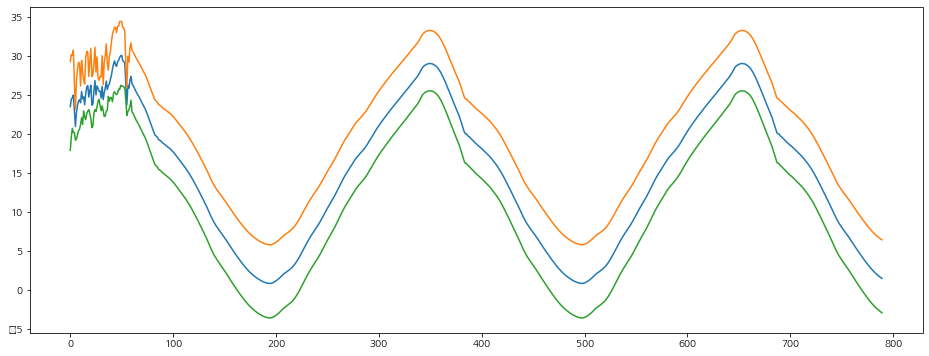

In [432]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)